## Installing the libraries

In [1]:
!pip install "jax[cuda12_local]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.87 requires jax>=0.4.27, but you have jax 0.4.23 which is incompatible.
chex 0.1.87 requires jaxlib>=0.4.27, but you have jaxlib 0.4.23+cuda12.cudnn89 which is incompatible.
flax 0.8.5 requires jax>=0.4.27, but you have jax 0.4.23 which is incompatible.
optax 0.2.3 requires

In [2]:
!pip install torch==2.1.0+cu121 torchvision==0.16.0+cu121 torchaudio==2.1.0 torchtext==0.16.0+cpu torchdata==0.7.0 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 GB 810.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1+cu121
    Uninstalling torch-2.4.1+cu121:
      Successfully uninstalled torch-2.4.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1+cu121
    Uninstalling torchvision-0.19.1+cu121:
      Successfully uninstalled torchvision-0.19.1+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.4.1+cu121
    Uninstalli

In [3]:
!wget -q https://github.com/saurabhkumar9901/diffusers/raw/master/examples/dreambooth/train_dreambooth.py
!wget -q https://github.com/saurabhkumar9901/diffusers/raw/master/scripts/convert_diffusers_to_original_stable_diffusion.py
%pip install -qq git+https://github.com/saurabhkumar9901/diffusers
%pip install -q -U --pre triton
%pip install -q accelerate transformers ftfy bitsandbytes gradio natsort safetensors xformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.1.0+cu121 requires triton==2.1.0, but you have triton 3.0.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Loading the model

In [33]:
model_sd = "CompVis/stable-diffusion-v1-4"
output_dir = "/content/stable_diffusion_weights/zwx"

In [22]:
!mkdir -p $output_dir

In [23]:
concepts_list = [
    {
        "instance_prompt": "zwx",
        "class_prompt": "photo of a person",
        "instance_data_dir": "/content/data/zwx",
        "class_data_dir": "/content/data/person"

    }
]

In [24]:
import json
import os
import random

for c in concepts_list:
  os.makedirs(c["instance_data_dir"], exist_ok=True)

In [25]:
with open("concepts_list.json", "w") as f:
  json.dump(concepts_list, f, indent=4)

## Parameters

In [26]:
num_imgs = 30
num_class_images = num_imgs * 12
max_num_steps = num_imgs * 80
learning_rate = 1e-6 # 0.0000001
lr_warmup_steps = int(max_num_steps / 30)
print(num_imgs, num_class_images, max_num_steps, learning_rate, lr_warmup_steps)

30 360 2400 1e-06 80


## Training

In [34]:
!python3 train_dreambooth.py \
  --pretrained_model_name_or_path=$model_sd \
  --pretrained_vae_name_or_path="stabilityai/sd-vae-ft-mse" \
  --output_dir=$output_dir \
  --revision="fp16" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --seed=1000 \
  --resolution=512 \
  --train_batch_size=1 \
  --train_text_encoder \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --learning_rate=$learning_rate \
  --lr_scheduler="constant" \
  --lr_warmup_steps=80 \
  --num_class_images=$num_class_images \
  --sample_batch_size=4 \
  --max_train_steps=$max_num_steps \
  --save_interval=10000 \
  --save_sample_prompt="zwx" \
  --concepts_list="concepts_list.json"


/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2024-10-05 08:21:12.940610: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 08:21:12.960622: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 08:21:12.966783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:

In [35]:
from natsort import natsorted
from glob import glob
import os

weights_dir = natsorted(glob(output_dir + os.sep + '*'))[-1]
print('Weights directory: ', weights_dir)

Weights directory:  /content/stable_diffusion_weights/zwx/2400


In [38]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def grid_img(imgs, rows=1, cols=3, scale=1):
  assert len(imgs) == rows * cols

  w, h = imgs[0].size
  w, h = int(w*scale), int(h*scale)

  grid = Image.new('RGB', size=(cols*w, rows*h))
  grid_w, grid_h = grid.size

  for i, img in enumerate(imgs):
      img = img.resize((w,h), Image.LANCZOS)
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

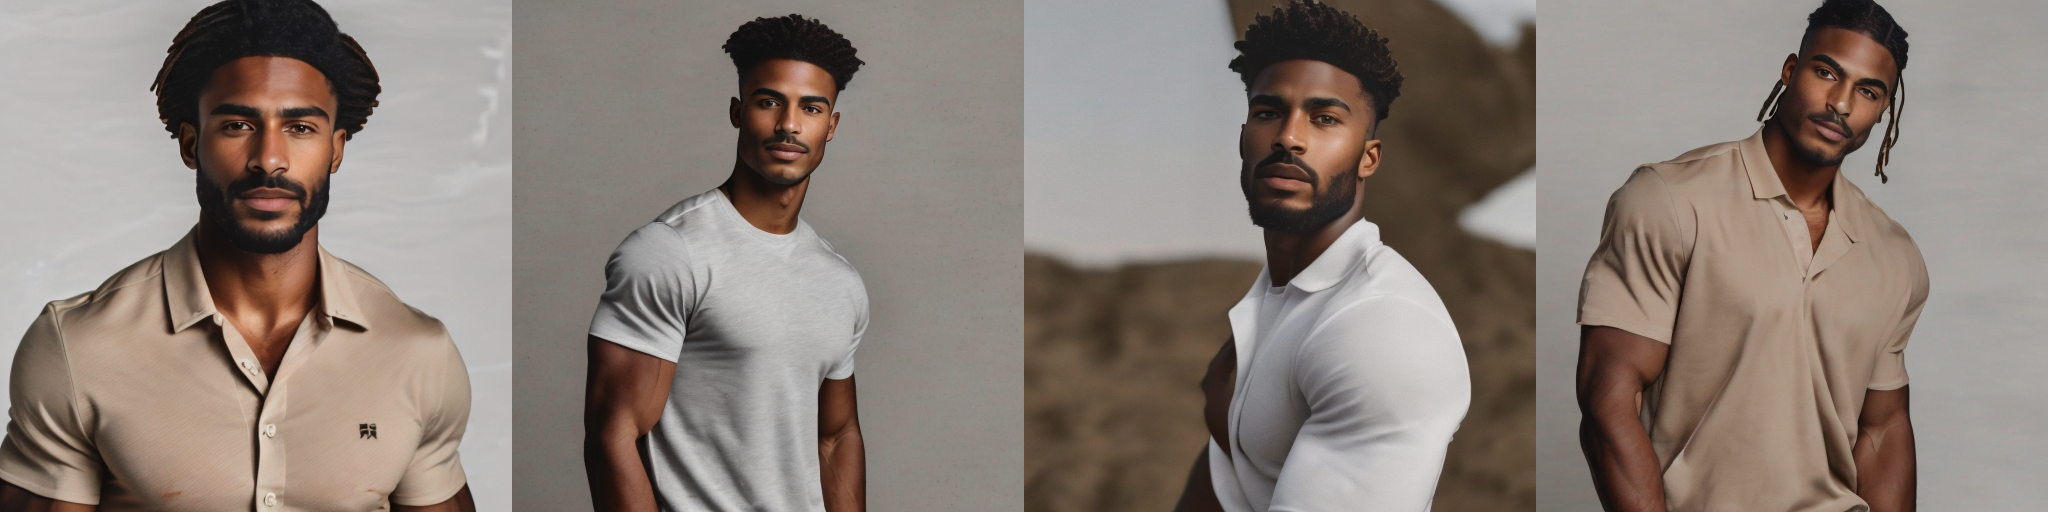

In [39]:
weights_folder = output_dir
folders = sorted([f for f in os.listdir(weights_folder) if f != "0"], key = lambda x: int(x))

imgs_test = []

for imgs, folder in enumerate(folders):
  folder_path = os.path.join(weights_folder, folder)
  image_folder = os.path.join(folder_path, "samples")
  images = [f for f in os.listdir(image_folder)]

  for i in images:
    img_path = os.path.join(image_folder, i)
    r = Image.open(img_path)
    imgs_test.append(r)

grid_img(imgs_test, rows=1, cols=4, scale=1)

##Convert your model into Stable Diffusion Checkpoint

In [47]:
ckpt_path = weights_dir + "/model.ckpt"

half_arg = "--half" # fp16

!python convert_diffusers_to_original_stable_diffusion.py --model_path $weights_dir  --checkpoint_path $ckpt_path $half_arg
print(f"Converted to ckpt and saved in {ckpt_path}")

/content/convert_diffusers_to_original_stable_diffusion.py:290: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet_state_dict = torch.load(unet_path, map_location="cpu")
/co

## Inference your newly trained Model

In [41]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [71]:

model_path = weights_dir
print(model_path)


/content/stable_diffusion_weights/zwx/2400


In [72]:
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16).to('cuda')

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/models/modeling_utils.py:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_glo

In [73]:
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()
seed = 1000

Seed: 891320465


  0%|          | 0/50 [00:00<?, ?it/s]

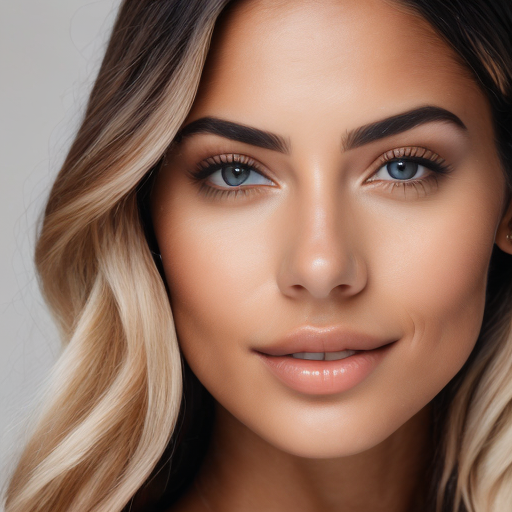

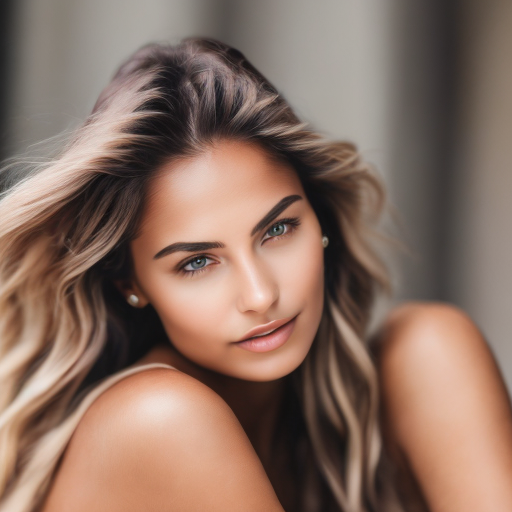

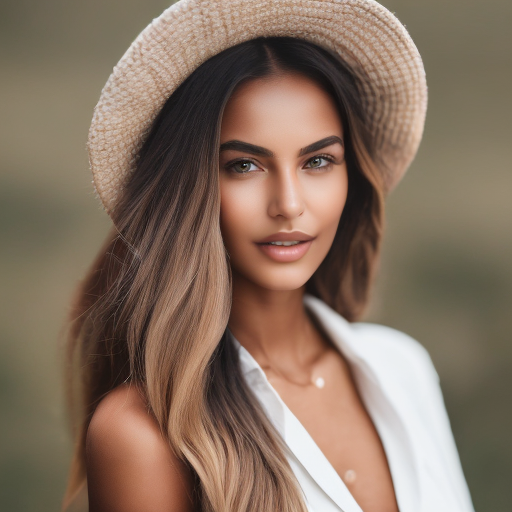

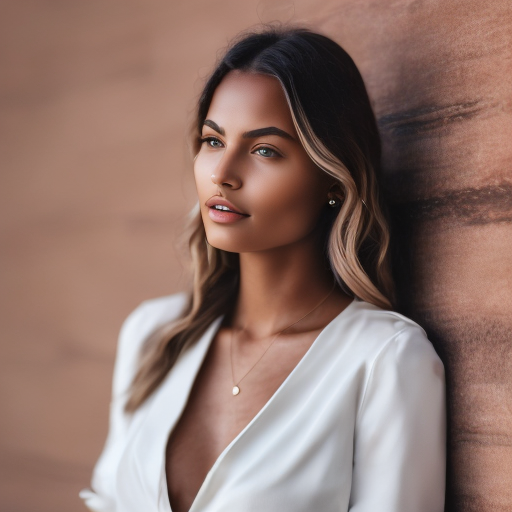

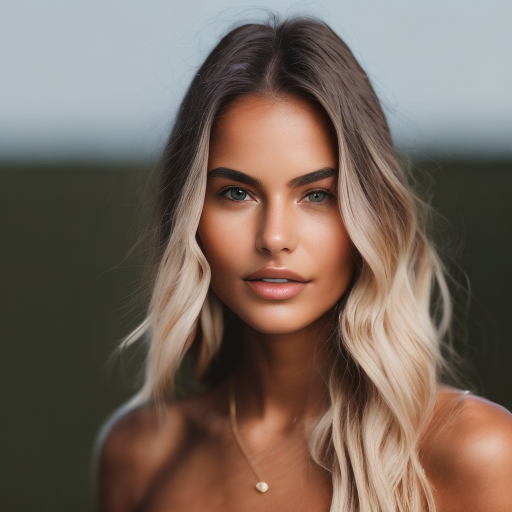

In [74]:
prompt = " realistic image of a zwx girl, highly detailed , unsplash "
negative_prompt = "bad anatomy, ugly, deformed, desfigured, distorted face, poorly drawn hands, poorly drawn face, poorly drawn feet, blurry, low quality, low definition, lowres, out of frame, out of image, cropped, cut off, signature, watermark"
num_samples = 5
guidance_scale = 10
num_inference_steps = 50
height = 512
width = 512

seed = random.randint(0, 2147483647)
print("Seed: {}".format(str(seed)))
generator = torch.Generator(device='cuda').manual_seed(seed)

with autocast("cuda"), torch.inference_mode():
    imgs = pipe(
        prompt,
        negative_prompt=negative_prompt,
        height=height, width=width,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=generator
    ).images

for img in imgs:
    display(img)

## **Upload your model to hugging face**

In [56]:
!pip install huggingface_hub


In [65]:
from huggingface_hub import notebook_login

notebook_login()


In [64]:
repo_id = "Saurabh2411/Realism_fined_tuned" # your repo id here

In [66]:
from huggingface_hub import HfApi

api = HfApi()


api.upload_folder(
    folder_path="/content/stable_diffusion_weights/zwx/2400",  # Path to your saved model folder
    repo_id=repo_id,  # Your repo_id from the step above
    repo_type="model"  # Make sure to set the correct repo type
)


model.ckpt:   0%|          | 0.00/2.13G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Saurabh2411/Realism_fined_tuned/commit/46f64a32bf0a64c592ef01470c184248ed29d656', commit_message='Upload folder using huggingface_hub', commit_description='', oid='46f64a32bf0a64c592ef01470c184248ed29d656', pr_url=None, pr_revision=None, pr_num=None)

## **Test your model**

In [75]:
new_model_path = "Saurabh2411/Realism_fined_tuned"
pipe = StableDiffusionPipeline.from_pretrained(new_model_path, torch_dtype=torch.float16).to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [76]:
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()
seed = 1000

Seed: 1081200268


  0%|          | 0/50 [00:00<?, ?it/s]

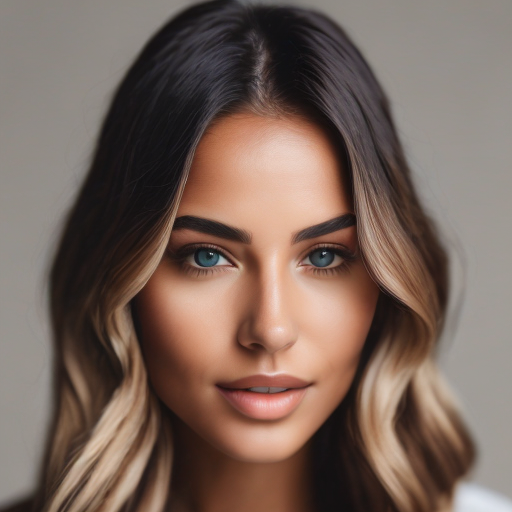

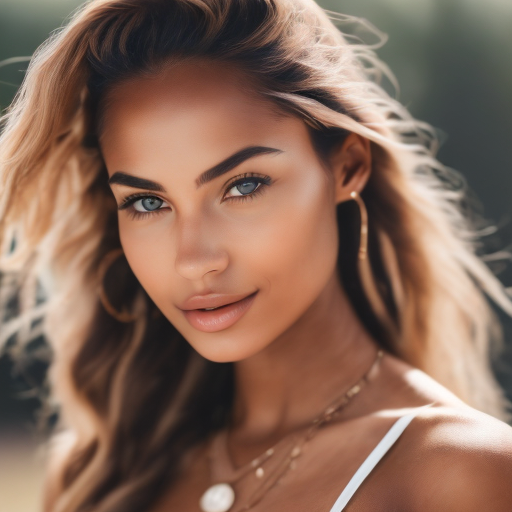

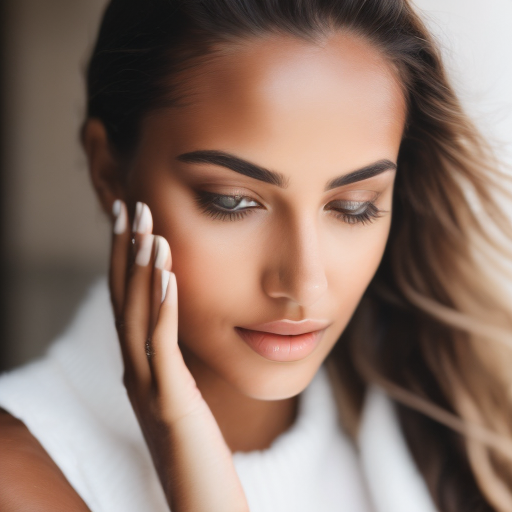

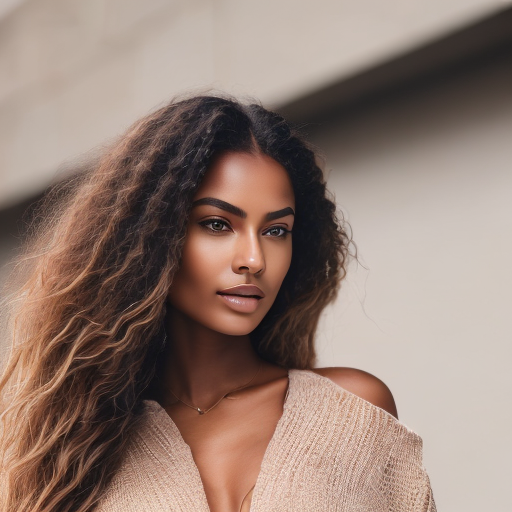

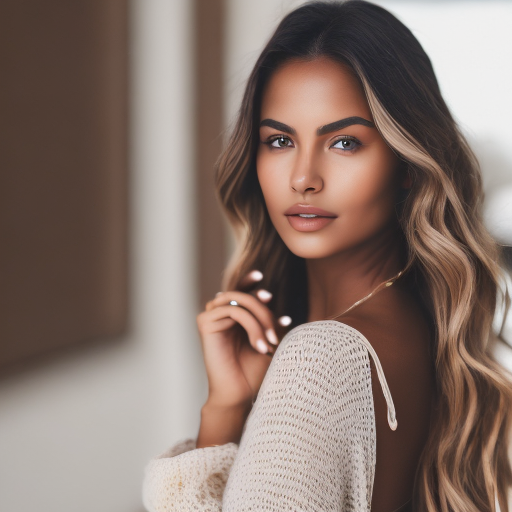

In [77]:
prompt = " realistic image of a zwx girl, highly detailed , unsplash "
negative_prompt = "bad anatomy, ugly, deformed, desfigured, distorted face, poorly drawn hands, poorly drawn face, poorly drawn feet, blurry, low quality, low definition, lowres, out of frame, out of image, cropped, cut off, signature, watermark"
num_samples = 5
guidance_scale = 10
num_inference_steps = 50
height = 512
width = 512

seed = random.randint(0, 2147483647)
print("Seed: {}".format(str(seed)))
generator = torch.Generator(device='cuda').manual_seed(seed)

with autocast("cuda"), torch.inference_mode():
    imgs = pipe(
        prompt,
        negative_prompt=negative_prompt,
        height=height, width=width,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=generator
    ).images

for img in imgs:
    display(img)